In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

tutorial from https://www.geeksforgeeks.org/ml-reinforcement-learning-algorithm-python-implementation-using-q-learning/

## Define Graph

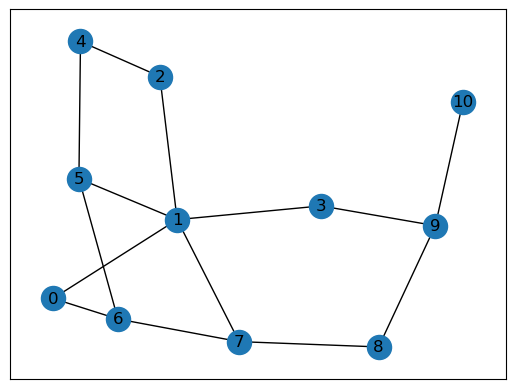

In [5]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), 
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]
  
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

## Define reward as matrix for the bot

In [7]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    #print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    #print(point[::-1])
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0

M[goal, goal] = 100
print(M)

[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


## Define some utility functions to be used in the training

In [24]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
gamma = 0.75 #discount factor?
initial_state = 1

#determine available action for given state
def available_actions(state):
    current_state_row = M[state,]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

#picks one of available actions randomly
def sample_next_action(available_actions_range):
    return int(np.random.choice(available_actions_range,1))

action = sample_next_action(available_action)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action,max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if (np.max(Q) > 0):
        return np.sum(Q/np.max(Q)*100)
    else:
        return 0
    
update(initial_state, action, gamma)

0

## Training and evaluation the bot using the Q-Matrix

most efficient path is [0, 1, 3, 9, 10]


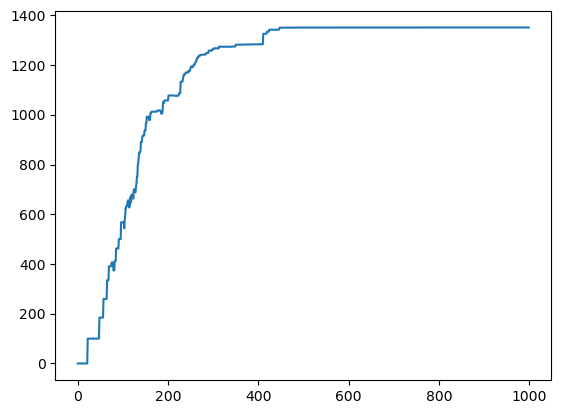

In [25]:
#training
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

#print(f'trained Q matrix: {Q/np.max(Q)*100}')

#testing
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print(f'most efficient path is {steps}')
plt.plot(scores)
plt.show()

## More complex environment

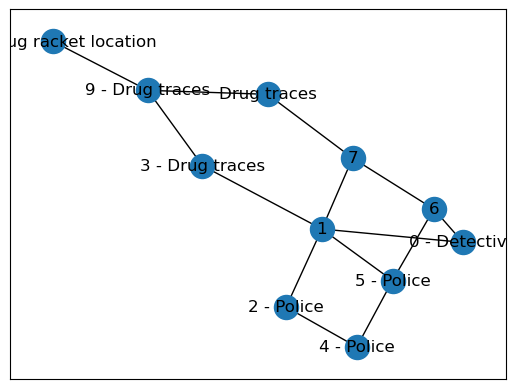

In [23]:
# Defining the locations of the police and the drug traces
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
		4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
		9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
plt.show()


In [ ]:
Q = np.matrix(np.zeros(MATRIX_SIZE,MATRIX_SIZE))
env_police = np.matrix(np.zeros(MATRIX_SIZE,MATRIX_SIZE))
env_drugs = np.matrix(np.zeros(MATRIX_SIZE,MATRIX_SIZE))
initial_state = 1

def available_actions(state):
    current_state_row = M[state,]
    return np.where(current_state_row >= 0)[1]

def sample_next_action(available_actions_range):
    return int(np.random.choice(available_actions_range,1))

#exploring the environment
def collect_environmental_data(action):
    found = []
    if action in police: found.append('p')
    if action in drug_traces: found.append('d')
    return found

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    #if there are multiple best actions, choose one at random
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment: env_police[current_state, action] += 1
    if 'd' in environment: env_drugs[current_state, action] += 1
    if (np.max(Q) > 0):
        return np.sum(Q/np.max(Q)*100)
    else: 
        return 0
    
update(initial_state, action, gamma)

def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
